# <span style="color:cornflowerblue">Pandas SARS-CoV-2 Project</span> 
#### <span style="color:cornflowerblue">March 2022</span>
***
**Task:** Using the *time_series_covid19_confirmed_US.csv* CSV file provided and your knowledge of Pandas and Python, answer the questions contained within this notebook. 

***
### <span style="color:cornflowerblue">Section One:</span>
**Proccess:** Pandas was imported as variable *pd* and the csv file was read in as variable *confirmed*. Dataframe entries by were grouped by US state/territory using the sum of cases per day of that state/territory.

In [1]:
import pandas as pd
confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
ByTerr = confirmed.groupby('Province_State').sum()
ByTerr.head()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,0,...,511779,511789,512711,513138,513580,514072,514391,514619,514980,515388
Alaska,2604232344,26040,232344.0,1747.177765,-4293.070291,0,0,0,0,0,...,61435,61611,61830,61976,62161,62161,62161,62161,62797,62797
American Samoa,16,16,60.0,-14.271000,-170.132000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,0,0,0,0,1,...,836737,837244,837849,837987,838558,839334,839888,840492,841078,841811
Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,0,0,0,0,0,...,328707,328946,329177,329511,329695,329860,329929,330008,330186,330398


***
Initially, only summer months were required for the query, so only columns 166 (July 1st 2020) through 258 (September 30th 2020) were kept in dataframe *ByTerrSummer*.

In [2]:
# grabs all rows in columns #166-258 and puts subdata in a new dataframe
ByTerrSummer = ByTerr.iloc[:,166:258]
ByTerrSummer.head()

,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,...,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,39647,41340,42255,43216,44022,44932,46348,48149,49695,51329,...,145202,145859,146897,149263,150239,150965,151604,152350,153584,154772
Alaska,1184,1234,1294,1349,1382,1410,1434,1485,1537,1591,...,7862,7922,7999,8142,8269,8388,8500,8617,8739,8845
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,84105,87445,91872,94567,98103,101455,105094,108614,112671,116892,...,214251,214846,215284,215852,216367,216826,217237,217510,218184,218507
Arkansas,21197,22075,22622,23209,23814,24253,24512,25246,26052,26803,...,76364,76981,77963,79049,79946,80755,81242,82049,82755,83697


***
**1) Which state/territory had the highest numerical increase in confirmed cases over the summer months (July 1st through the end of September)?**

>**Proccess:** A new column was added named *Increase*, which held the difference between the total cases on the last day of summer and the total cases on the first day of summer for each province; essencially, the numerical increase in confirmed cases over the summer months. The dataframe was sorted in descending order by this column, so that the states/territories with the highest numerical increases in confirmed cases over the summer months could be found using head().

>**Answer:** Texas was the state/territory that had the highest numerical increase in confirmed cases over the summer months with a total increase of 605198 cases, diriving from 172859 cases on 7/1/20 to 778057 cases on 9/30/20.

In [3]:
# new column of difference between cases on 9/30 and cases on 7/1
ByTerrSummer['Increase'] = ByTerrSummer['9/30/20'] - ByTerrSummer['7/1/20']
NumSummer = ByTerrSummer.sort_values(by='Increase',ascending=False)
NumSummer.loc[:,['7/1/20','9/30/20','Increase']].head()

,7/1/20,9/30/20,Increase
Province_State,,,
Texas,172859,778057,605198
California,247317,822191,574874
Florida,158997,706516,547519
Georgia,84242,318026,233784
Illinois,144013,295720,151707


***
**2) Which state/territory had the highest percentage increase in confirmed cases over the same time period?**

>**Proccess:** A new column was added named *% Increase*, with its contents being calculated by dividing the numerical increase by the original number of cases on day one (7/1/20), and multiplying that value by 100. The dataframe was sorted in descending order by this column, so that the states/territories with the highest percentage increases in confirmed cases over the summer months could be found using head().

>**Answer:** The Virgin Islands were the state/territory that had the highest percentage increase in confirmed cases over the summer months, with a total percent increase of 1364.44% from a total numeric increase of 1228 cases, going from 90 cases on 7/1/20 to 1318 cases on 9/30/20.

In [4]:
ByTerrSummer['% Increase'] = (ByTerrSummer['Increase'] / ByTerrSummer['7/1/20']) * 100 #New column of quotient of increase and 7/1 columns
PercSummer = ByTerrSummer.sort_values(by='% Increase',ascending=False)
PercSummer.loc[:,['7/1/20','9/30/20','% Increase']].head()

,7/1/20,9/30/20,% Increase
Province_State,,,
Virgin Islands,90,1318,1364.444444
Puerto Rico,1729,24000,1288.085599
Hawaii,926,12597,1260.367171
Montana,1016,13071,1186.515748
Guam,267,2488,831.835206


***
**3) What was the 7-day average increase in cases per state? (mean of cases per day over a seven day period for 8 weeks, starting on June 1st.)**

>**Proccess:** Next, because only 8 weeks, starting June 1st, were required for the query, only columns 136 (June 1st 2020) through 192 (July 22nd 2020) were kept in dataframe *ByTerr8Week*.
<br> A new, blank dataframe was created named *dfWeeklyInc*, along with a counting variable starting at 0. A for-loop was created to range from the 7th day in the 8 week period to the 56th day, going by steps of 7. Each time it looped, the count was raised by 1 for the naming variable, variables j and k changed depending on the value of i, and new columns in the dataframe *dfWeeklyInc* were created by taking the average of all days in each week for each province. Next, each of those weekly means for each province were averaged, creating column *Avg Weekly Avg Inc* in the dataframe. For observational purposes, the dataframe was sorted from highest increase to lowest by province, and the head() function was used for easy viewing.

>**Answer:** New York had the highest average weekly average increase, with the average weekly average increase of 395351.39 cases over the specified 8 week period. The runner up was California with an average weekly increase of 251589.61 cases, followed by Texas with 185274.93, Florida with 180836.43, and New Jersey with 172010.96.

In [5]:
ByTerr8Week = ByTerr.iloc[:,136:192]

dfWeeklyInc = pd.DataFrame()
count = 0
for i in range(7,57,7): # starting at column 7 to column 56, grouping by 7 (days in each week)
    count += 1
    j = i - 1 # stop column spot
    k = i - 7 # start column spot
    name = "Week " + str(count) + " Avg" # new column naming
    dfWeeklyInc[name] = ByTerr8Week.iloc[:,k:j+1].mean(axis=1) #mean of rows for each column in this range
dfWeeklyInc['Avg Weekly Avg Inc'] = dfWeeklyInc.mean(axis=1) #new column for means of means
Top5AvgWeeklyInc = dfWeeklyInc.sort_values(by='Avg Weekly Avg Inc',ascending=False)
Top5AvgWeeklyInc.head()

,Week 1 Avg,Week 2 Avg,Week 3 Avg,Week 4 Avg,Week 5 Avg,Week 6 Avg,Week 7 Avg,Week 8 Avg,Avg Weekly Avg Inc
Province_State,,,,,,,,,
New York,377895.571429,383629.571429,388240.142857,392794.714286,397463.000000,402276.714286,407700.571429,412810.857143,395351.392857
California,123810.285714,144871.000000,169996.857143,207017.857143,252728.857143,308857.714286,370406.571429,435027.714286,251589.607143
Texas,70883.428571,82866.285714,101847.714286,134834.142857,179313.285714,236149.857143,304593.285714,371711.428571,185274.928571
Florida,60201.142857,69633.571429,86702.285714,117618.857143,170805.000000,235030.714286,315215.142857,391484.714286,180836.428571
New Jersey,163024.714286,166227.142857,168756.285714,171084.571429,173380.285714,175673.428571,177959.571429,179981.714286,172010.964286


***
**4) What proportion of cases nationally had occurred in NY State at the start of each month, from March 2020 to August 2020?**

>**Proccess:** Next, since only the first days of spring months were required for the query, only columns '3/1/20', '4/1/20', '5/1/20', '6/1/20', '7/1/20', and '8/1/20' were kept for new dataframe *SprMonths*, and these columns were transposed to rows.
<br> A new column was added named *Date Total*, which held the sum of each of the dataframe *SprMonths's* rows. A second column was added named *NY Proportion*, with its contents being calculated by dividing contents of each row in the *New York* column by the contents of each row in the *Date Total* column to find the proportion of cases nationally that occurred in NY State at the start of each month.

>**Answer:** The proportion of cases nationally that occurred in NY State on March 1st was 0, April 1st was 0.402, May 1st was 0.280, June 1st was 0.206, July 1st was 0.147, and August 1st was 0.091.

In [6]:
# new df of only these columns but all rows
SprMonths = ByTerr[['3/1/20','4/1/20','5/1/20','6/1/20','7/1/20','8/1/20']]
SprMonths = SprMonths.reset_index(drop=False)
SprMonths = SprMonths.T
SprMonths = SprMonths.rename(columns=SprMonths.iloc[0]).drop(SprMonths.index[0])

# new column of date sums
SprMonths['Date Total'] = SprMonths.sum(axis="columns")
# new column of quotient of new york total and date totals
SprMonths['NY Proportion'] = (SprMonths['New York'] / SprMonths['Date Total'])

SprMonths.loc[:,['NY Proportion']].T

,3/1/20,4/1/20,5/1/20,6/1/20,7/1/20,8/1/20
NY Proportion,0,0.402491,0.280299,0.20638,0.147163,0.0906001


***
### <span style="color:cornflowerblue">Section Two:</span>
**Proccess:** Plots were provided to show the results of each question in Part 1. 

*Hint: It is up to you to determine how best to demonstrate that result.*
***

**1) Which state/territory had the highest numerical increase in confirmed cases over the summer months (July 1st through the end of September.)**

The line plot below shows the number of cases on the y-axis and the top 5 US provinces on the x-axis. The data taken for this plot was from dataframe *NumSummer* and consists of the increase of cases over the summer months.

Text(0, 0.5, 'Cases')

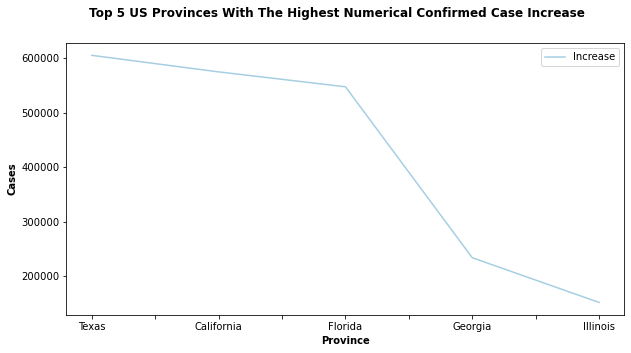

In [28]:
plot1a = NumSummer.loc[:,['Increase']].head().plot(kind="line",cmap='Paired',figsize=(10,5))
plot1a.figure.suptitle("Top 5 US Provinces With The Highest Numerical Confirmed Case Increase",fontweight="bold")
plot1a.set_xlabel("Province",fontweight="bold")
plot1a.set_ylabel("Cases",fontweight="bold")

The area plot below shows the number of cases on the y-axis and the top 5 US provinces on the x-axis. The data taken for this plot was from dataframe *NumSummer* and consists of the cases on 7/1/20, increase of cases over the summer months, and the cases on 9/30/20.

Text(0, 0.5, 'Cases')

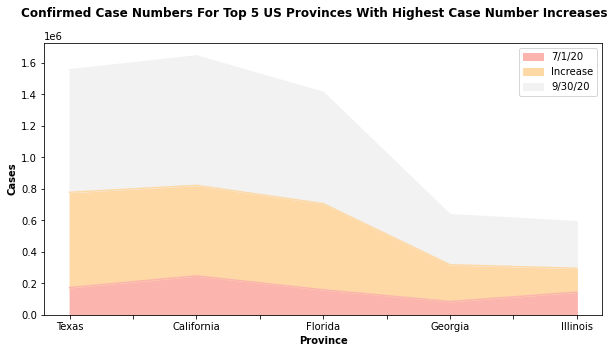

In [8]:
plot1b = NumSummer.loc[:,['7/1/20','Increase','9/30/20']].head().plot(kind="area",cmap='Pastel1',figsize=(10,5))
plot1b.figure.suptitle("Confirmed Case Numbers For Top 5 US Provinces With Highest Case Number Increases",fontweight="bold")
plot1b.set_xlabel("Province",fontweight="bold")
plot1b.set_ylabel("Cases",fontweight="bold")

**2) Which state/territory had the highest percentage increase in confirmed cases over the same time period?**

The line plot below shows the case increase percentage on the y-axis and the top 5 US provinces on the x-axis. The data taken for this plot was from dataframe *PercSummer* and consists of the percent increase of cases over the summer months.

Text(0, 0.5, 'Cases Increase %')

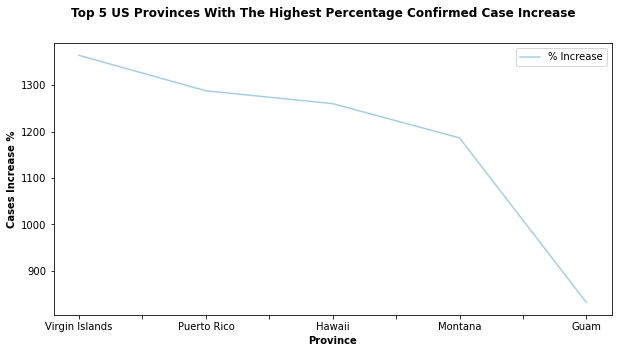

In [21]:
plot2a = PercSummer.loc[:,['% Increase']].head().plot(kind="line",cmap='Paired',figsize=(10,5))
plot2a.figure.suptitle("Top 5 US Provinces With The Highest Percentage Confirmed Case Increase",fontweight="bold")
plot2a.set_xlabel("Province",fontweight="bold")
plot2a.set_ylabel("Cases Increase %",fontweight="bold")

The area plot below shows the number of cases on the y-axis and the top 5 US provinces on the x-axis. The data taken for this plot was from dataframe *PercSummer* and consists of the cases on 7/1/20 and the increase of cases over the summer months.

Text(0, 0.5, 'Cases')

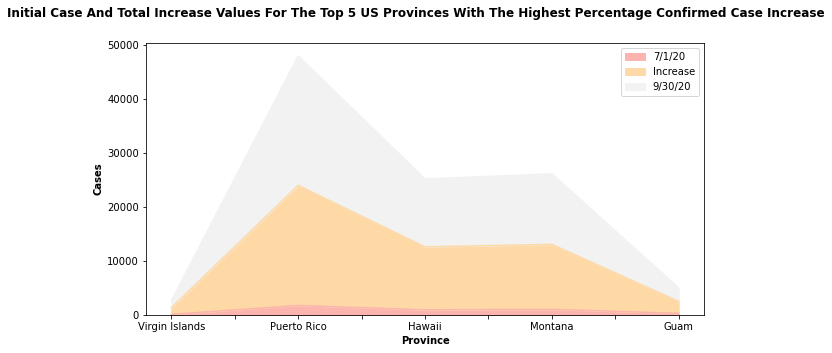

In [27]:
plot2b = PercSummer.loc[:,['7/1/20','Increase', '9/30/20']].head().plot(kind="area",cmap='Pastel1',figsize=(10,5))
plot2b.figure.suptitle("Initial Case And Total Increase Values For The Top 5 US Provinces With The Highest Percentage Confirmed Case Increase",fontweight="bold")
plot2b.set_xlabel("Province",fontweight="bold")
plot2b.set_ylabel("Cases",fontweight="bold")

**3) What was the 7-day average increase in cases per state? (mean of cases per day over a seven day period for 8 weeks, starting on June 1st.)**

The line plot below shows the average number of weekly cases on the y-axis and the top 5 US provinces on the x-axis. The data taken for this plot was from dataframe *Top5AvgWeeklyInc* and consists of the average weekly average increase of cases over the 8 weeks.

Text(0, 0.5, 'Avg Weekly Case Inc Avg')

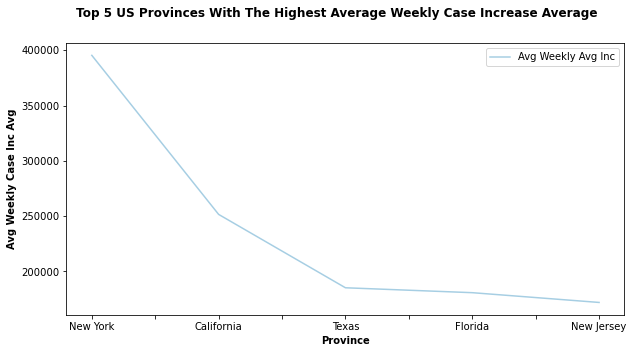

In [29]:
plot3a = Top5AvgWeeklyInc.loc[:,['Avg Weekly Avg Inc']].head().plot(kind="line",cmap='Paired',figsize=(10,5))
plot3a.figure.suptitle("Top 5 US Provinces With The Highest Average Weekly Case Increase Average",fontweight="bold")
plot3a.set_xlabel("Province",fontweight="bold")
plot3a.set_ylabel("Avg Weekly Case Inc Avg",fontweight="bold")

The line graph below shows the average number of cases on the y-axis and the weeks on the x-axis. The data taken for this plot was from dataframe *Top5AvgWeeklyInc* and consists of the average weekly number of cases over the 8 weeks for the top 5 US provinces.

Text(0, 0.5, 'Case Average')

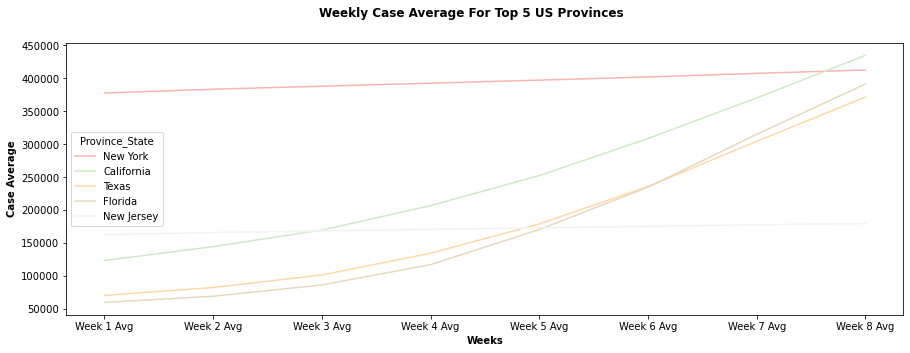

In [19]:
plot3b = Top5AvgWeeklyInc.iloc[:,:-1].head().T.plot(kind="line",cmap='Pastel1',figsize=(15,5))
plot3b.figure.suptitle("Weekly Case Average For Top 5 US Provinces",fontweight="bold")
plot3b.set_xlabel("Weeks",fontweight="bold")
plot3b.set_ylabel("Case Average",fontweight="bold")

**4) What proportion of cases nationally had occurred in NY State at the start of each month, from March 2020 to August 2020?**

The line graph below shows the number of cases on the y-axis and the dates on the x-axis. The data taken for this plot was from dataframe *SprMonths* and consists of the number of cases on each date for NY city alone compared to the total number of national cases for all provinces on each date.

Text(0, 0.5, 'Cases')

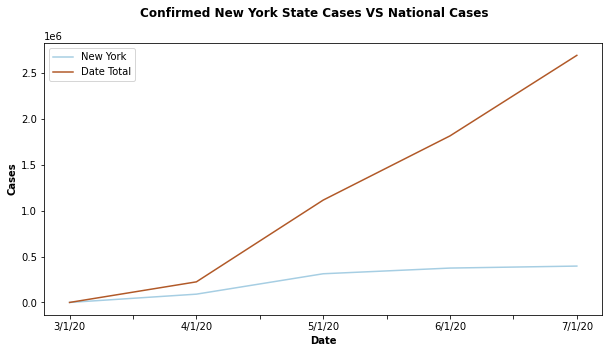

In [30]:
plot4a = SprMonths.loc[:,['New York', 'Date Total']].head().plot(kind="line",cmap='Paired',figsize=(10,5))
plot4a.figure.suptitle("Confirmed New York State Cases VS National Cases",fontweight="bold")
plot4a.set_xlabel("Date",fontweight="bold")
plot4a.set_ylabel("Cases",fontweight="bold")

The area plot below shows the number of proportion out of 1 the y-axis and the dates on the x-axis. The data taken for this plot was from dataframe *NYdf* and consists of the proportion of cases on each date for 4 US provinces.

Text(0, 0.5, 'Proportion')

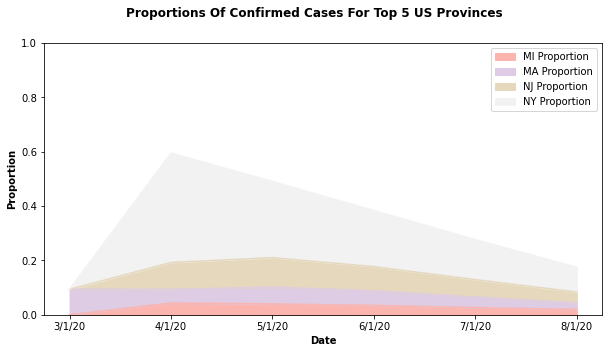

In [24]:
NYdf = pd.DataFrame()
NYdf["NY Proportion"] = SprMonths['NY Proportion']
NYdf["NJ Proportion"] = (SprMonths['New Jersey'] / SprMonths['Date Total'])
NYdf["MA Proportion"] = (SprMonths['Massachusetts'] / SprMonths['Date Total'])
NYdf["MI Proportion"] = (SprMonths['Michigan'] / SprMonths['Date Total'])

plot4b = NYdf.loc[:,['MI Proportion', 'MA Proportion', 'NJ Proportion', 'NY Proportion']].plot(kind="area",ylim=(0,1),cmap='Pastel1',figsize=(10,5))
plot4b.figure.suptitle("Proportions Of Confirmed Cases For Top 5 US Provinces",fontweight="bold")
plot4b.set_xlabel("Date",fontweight="bold")
plot4b.set_ylabel("Proportion",fontweight="bold")